# peaks Tutorial 4: Crystal structures, Brillouin zones, and cut planning

It is often useful to overplot Brillouin zones on data, to use these for cut planning, or to have quick access to properties of the crystal structure. To this end, the `.utils.structure` module implements some basic crystal structure tools. This heavily utilises ase (https://wiki.fysik.dtu.dk/ase/index.html) as well as spglib for some primitive lattice transformations and gemmi for some additional symmetry analysis.

In [1]:
#Import full PyPhoto package
import sys
import time
sys.path.insert(0, '../')

%load_ext autoreload
%autoreload 2
%aimport peaks
from peaks import *

## Loading a structure

The `.utils.structure.crystal` class automates structure definition/loading and subsequent plotting/inspection in a convenient form:

In [2]:
help(crystal)

Help on function crystal in module peaks.utils.structure:

crystal(struc, **kwargs)
    Accepts or generates a crystal structure file in the appropriate ase.atoms.Atoms format for passing to the
    peaks structure class
    
        Input:
            struc - crystal structure in one of several formats:
                - existing ase.atoms.Atoms object, e.g. as loaded using load_structure()
                - existing pymatgen.core.structure.Structure object
                - string giving file path to relevant .cif file, which is then parsed.
                    Default parser is ase, can also specify `parser=pymatgen` to use pymatgen
                - string giving general label of lattice type, of the following type:
                    sc, fcc, bcc, tetragonal, bct, hcp, rhombohedral, orthorhombic, mcl, diamond,
                    zincblende, rocksalt, cesiumchloride, fluorite, wurtzite, or mx2.
                        for most of these, the following parameters (see ase.build.bul

You can pass an `ase.atoms.Atoms` object directly:

In [4]:
temp =load_structure('example_data/Sr2RuO4.cif')
print(type(temp))
a = crystal(temp)

<class 'ase.atoms.Atoms'>


/Users/pdk6/Dropbox/Work/Lab/Software/PyPhoto/PyPhoto_Master/venv_office/lib/python3.8/site-packages/ase/io/cif.py:401: UserWarning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(139, setting=1). This may result in wrong setting!
  warnings.warn(


You can pass a `pymatgen.core.structure.Structure` object directly:

In [5]:
import pymatgen.core
temp = pymatgen.core.Structure.from_file('example_data/Sr2RuO4.cif')
print(type(temp))
a1 = crystal(temp)

<class 'pymatgen.core.structure.Structure'>


You can pass the text string to a .cif file:

In [6]:
b = crystal('example_data/Sr2RuO4.cif')

 Analysis warning: crystal system 'tetragonal' is not interpreted for space group Spacegroup(139, setting=1). This may result in wrong setting!


Or you can define the crystal using standard parameters for the `ase.build.bulk` or `'ase.build.mx2` structures

In [7]:
c = crystal('mx2', formula='TiSe2', kind='1T')

In general, it is best to define the structure from the .cif file if possible, to get access to the maximum amount of information. Ocasionally the `ase` parser does not return the correct result, or will not work. If you have `pymatgen` installed, you can also specify that as an alternate parser of the .cif file. 

In [8]:
d = crystal('example_data/Sr2RuO4.cif', parser='pymatgen')

### Structure look-up - Materials Project

You can also pull crystal structure information direct from the materials project online database. For this, you should create an API key, which can be done at https://materialsproject.org 

The function `.utils.structure.get_structure` provides a simplified gateway to the Materials Project database for obtaining crystal structures

In [9]:
help(get_structure)

Help on function get_structure in module peaks.utils.structure:

get_structure(compound, index=None, sg_num=None, API_key=None)
    Attempt to automatically get the structure of a compound from the Materials Project database.
    Requires an API key which can be generated by creating an account at https://materialsproject.org
    
    Input:
        compound (str) - Formula for desired compound
        index (int or str) - selection parameters when multiple structures are returned. Either:
            - supply row number (int) of desired structure
            - supply materials project ID (string) of desired structure
        sg_num (int) - spacegroup number, used to specify particular space group only
        API_key (str) - API key for accessing the materials project database. Not required
          if key is stored in mp_API_key.txt in the .utils directory
    
    Output:
        instance of crystal structure class or pandas df with list of available structures



If only a single record exists, an instance of the crystal structure class will be returned.

You can either pass your key as an argument to the function, or you can create a file `mp_API_key.txt` in the `.utils` directory, where you include a single line with your key. Make sure you don't have a carrige return after your key.

In [10]:
my_key = '<<INSERT KEY HERE>>'

In [11]:
e = get_structure("VSe2")  #If supplying key directly here, e = get_structure("VSe2", API_key=my_key)

 Analysis warning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.


Single structure found, materials project ID: mp-694


 Analysis warning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.


If multiple records exist, a pandas dataframe containing the spacegroup information of these will be returned

In [12]:
f = get_structure("Fe2O3")

 Analysis warning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.


Multiple structures found. Please call function with materials project ID number of desired structure from following list:


,Spacegroup,u.c. formula,Materials project ID
0,P1,"{'Fe': 32.0, 'O': 48.0}",mp-1244911
1,P4_12_12,"{'Fe': 64.0, 'O': 96.0}",mp-1456
2,P1,"{'Fe': 32.0, 'O': 48.0}",mp-1245078
3,Pnma,"{'Fe': 8.0, 'O': 12.0}",mp-1205415
4,Pm-3m,"{'Fe': 2.0, 'O': 3.0}",mp-1068212
5,C2,"{'Fe': 16.0, 'O': 24.0}",mp-715572
6,P1,"{'Fe': 16.0, 'O': 24.0}",mp-776606
7,P1,"{'Fe': 32.0, 'O': 48.0}",mp-1245084
8,Pbcn,"{'Fe': 8.0, 'O': 12.0}",mp-510080
9,R-3c,"{'Fe': 4.0, 'O': 6.0}",mp-19770


You can select one of these by passing an index (row number of the above table) as an integer, or by passing the specific materials project ID number as a string:

In [13]:
g = get_structure('Fe2O3', 'mp-609465')
h = get_structure('Fe2O3', 22)

 Analysis warning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.
 Analysis warning: Issues encountered while parsing CIF: Some fractional coordinates rounded to ideal values to avoid issues with finite precision.
 Analysis warning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.


### Band structures
For structures sourced from Materials Project, you can also get the electronic band structure and DOS from that database.

<b>NB: This is often far from the true electronic strucutre, normally just an LDA calculation with no SOC, no +U etc., potentially with only a sparse k-grid, and so can be far off. But for a quick look, this can be quite helpful still. </b>
    
You can get the band strucutre using `.get_band_str()`. These band structure and DOS are then stored in `.band_str` and `.dos`. You can plot these using the various methods of pymatgen: https://pymatgen.org/pymatgen.electronic_structure.plotter.html

In [14]:
help(e.get_band_str)

Help on method get_band_str in module peaks.utils.structure:

get_band_str(mp_id=None, API_key=None) method of peaks.utils.structure.structure instance
    Attempt to automatically get the band structure of a compound from the Materials Project database.
    Requires an API key which can be generated by creating an account at https://materialsproject.org
    
    Input:
        mp_id (optional, str) - materials project ID of the structure. If None is provided,
          and it has not already been defined in the structure loading, then it will attempt
          to determine the relevant ID, and if there are multiple options, list these and ask
          for a specification to be made
        API_key (str) - API key for accessing the materials project database. Not required
          if key is stored in mp_API_key.txt in the .utils directory
    
    Output:
        The band structure and DOS are added to .band_str and .DOS



For a simple atom-resolved plot, you can use `.plot_band_str()` which first downloads the band structure if not already stored, and then makes a plot.

In [15]:
help(e.plot_band_str)

Help on method plot_band_str in module peaks.utils.structure:

plot_band_str(mp_id=None, API_key=None, **kwargs) method of peaks.utils.structure.structure instance
    Plots the band structure and DOS obtained from Materials Project. If these are not already loaded
    it will attempt to automatically get the band structure from the Materials Project database, or
    load one as defined in the function call.
    Requires an API key which can be generated by creating an account at https://materialsproject.org
    
    Input:
        mp_id (optional, str) - materials project ID of the structure. If None is provided,
          and it has not already been defined in the structure loading, then it will attempt
          to determine the relevant ID, and if there are multiple options, list these and ask
          for a specification to be made
        API_key (str) - API key for accessing the materials project database. Not required
          if key is stored in mp_API_key.txt in the .utils 

 Analysis warning: Attempting to download band structure and DOS from Materials Project repository. NB, these are typically performed at a low level of DFT (normally plain LDA) so treat these only as a very rough guide.
 Analysis warning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.


TypeError: 'type' object is not subscriptable

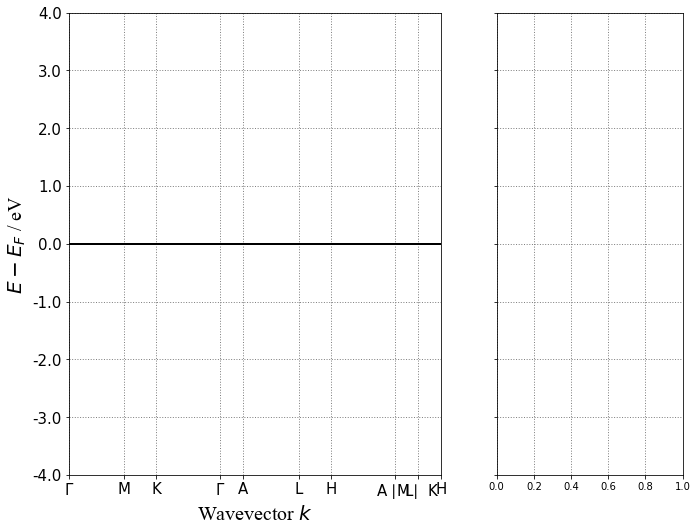

In [16]:
e.plot_band_str()

If the structure isn't originally loaded from materials project, you can call with a specific materials project ID, or can call without and the function will attempt to find a compatible structure from the compound and space group. If multiple options are found, a list of possible IDs will be returned as above.

In [ ]:
a.plot_band_str()

### Substrates

You can also download possible substrates for epitaxial growth, optionally defining the film orientation, using `.get_substrates`. Selection works as for `.get_bandstructure`. Again, take these with a big pinch of salt, but for an initial look can be helpful.

In [17]:
help(e.get_substrates)

Help on method get_substrates in module peaks.utils.structure:

get_substrates(orientation=None, mp_id=None, API_key=None) method of peaks.utils.structure.structure instance
    Gets suggested substrates from Materials Project database. Requires an API key
       which can be generated by creating an account at https://materialsproject.org
    
    Input:
        orientation (optional, tuple) - orientation for the film in format (h,k,l).
          If none is provided, all orientations returned.
        mp_id (optional, str) - materials project ID of the structure. If None is provided,
          and it has not already been defined in the structure loading, then it will attempt
          to determine the relevant ID, and if there are multiple options, list these and ask
          for a specification to be made
        API_key (str) - API key for accessing the materials project database. Not required
          if key is stored in mp_API_key.txt in the .utils directory
    
    Output:
   

In [18]:
e.get_substrates((0,0,1));

 Analysis warning: Downloading substrate options from Materials Project repository. NB, use these only as an initial guide.
 Analysis warning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.


,Substrate,Orientation,Materials project ID,Min. coincident interface area (Ang^2),Elastic energy (meV)
0,BaF2,1 1 1,mp-1029,68.187440,0.003063
1,Si,1 1 1,mp-149,155.857006,0.003413
2,Cu,1 1 1,mp-30,68.187440,0.004544
3,CeO2,1 1 1,mp-20194,155.857006,0.004587
4,GaN,0 0 1,mp-804,116.892754,0.005419
5,InP,1 1 1,mp-20351,185.080194,0.005830
6,Fe3O4,1 1 1,mp-19306,126.633817,0.006453
7,C,0 0 1,mp-48,68.187440,0.010392
8,Fe2O3,0 0 1,mp-24972,68.187440,0.012865
9,Bi2Te3,0 0 1,mp-34202,68.187440,0.013375


In [19]:
a.get_substrates((0,0,1));

Attempting to find matching record on Materials Project from compound name and space group


 Analysis warning: You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.


Single structure found, materials project ID: mp-4596


 /Users/pdk6/Dropbox/Work/Lab/Software/PyPhoto/PyPhoto_Master/peaks/utils/structure.py:969: UserWarning:Downloading substrate options from Materials Project repository. NB, use these only as an initial guide.
 /Users/pdk6/Dropbox/Work/Lab/Software/PyPhoto/PyPhoto_Master/venv_office/lib/python3.8/site-packages/pymatgen/ext/matproj.py:179: UserWarning:You are using the legacy MPRester, which is deprecated. If you are not a power user, ie., you do not have a lot of legacy code that uses many different MPRester methods, it is recommended you get a new API key from the new Materials Project front end. Once you use get your new API key, using the new API key will automatically route you to using the new MPRester.


,Substrate,Orientation,Materials project ID,Min. coincident interface area (Ang^2)
0,LaAlO3,0 0 1,mp-2920,76.186247
1,LaAlO3,1 0 1,mp-2920,76.186247
2,AlN,0 0 1,mp-661,76.186247
3,AlN,1 1 0,mp-661,243.795989
4,AlN,1 1 1,mp-661,198.084241
5,CeO2,1 0 0,mp-20194,30.474499
6,CeO2,1 1 1,mp-20194,152.372493
7,GaAs,1 0 0,mp-2534,137.135244
8,BaF2,1 0 0,mp-1029,76.186247
9,GaN,0 0 1,mp-804,45.711748


## Structural information

The `ase.atoms.Atoms` object is stored in `.structure`. On load, the primitive cell will be automatically attempted to be found, and is stored in `.primitive`.

In [20]:
a.structure

Atoms(symbols='Sr4Ru2O8', pbc=True, cell=[3.873, 3.873, 12.7323], spacegroup_kinds=...)

In [21]:
for i in a.structure:
    print(i)

Atom('Sr', [0.0, 0.0, 4.488135749999999], index=0)
Atom('Sr', [0.0, 0.0, 8.24416425], index=1)
Atom('Sr', [1.9365, 1.9365, 10.854285749999999], index=2)
Atom('Sr', [1.9365, 1.9365, 1.878014250000001], index=3)
Atom('Ru', [0.0, 0.0, 0.0], index=4)
Atom('Ru', [1.9365, 1.9365, 6.36615], index=5)
Atom('O', [0.0, 1.9365, 0.0], index=6)
Atom('O', [1.9365, 0.0, 0.0], index=7)
Atom('O', [1.9365, 0.0, 6.36615], index=8)
Atom('O', [0.0, 1.9365, 6.36615], index=9)
Atom('O', [0.0, 0.0, 2.0677255199999998], index=10)
Atom('O', [0.0, 0.0, 10.66457448], index=11)
Atom('O', [1.9365, 1.9365, 8.43387552], index=12)
Atom('O', [1.9365, 1.9365, 4.29842448], index=13)


In [22]:
a.structure.cell.get_bravais_lattice()

TET(a=3.8730000000000002203, c=12.732300000000000395)

In [23]:
a.primitive

Atoms(symbols='O4RuSr2', pbc=True, cell=[[3.873, 0.0, 0.0], [0.0, 3.873, 0.0], [-1.9365, -1.9365, 6.36615]], spacegroup_kinds=...)

In [24]:
for i in a.primitive:
    print(i)

Atom('O', [0.0, 1.9365, 0.0], index=0)
Atom('O', [0.0, -1.9364999999999999, 6.366149999999999], index=1)
Atom('O', [0.0, 0.0, 2.0677255199999993], index=2)
Atom('O', [1.9364999999999999, 1.9364999999999999, 4.298424479999998], index=3)
Atom('Ru', [0.0, 0.0, 0.0], index=4)
Atom('Sr', [0.0, 0.0, 4.488135749999998], index=5)
Atom('Sr', [1.9365, 1.9365, 1.878014249999998], index=6)


In [25]:
a.primitive.cell.get_bravais_lattice()

BCT(a=3.8730000000000002203, c=12.732300000000002171)

A nice display of the sites of the structure, as well as some guesses for the oxidation states of each site, can be returned from `.sites()`:

In [26]:
help(a.sites)

Help on method sites in module peaks.utils.structure:

sites(primitive=False) method of peaks.utils.structure.structure instance
    Display the sites of the strcutrue in a nice form (pandas dataframe), with automatic
    estimations of the oxidation states.
    
      Input parameters:
          primitive (optional, bool) - display the primative or conventional cell (default=False)
    
      Output:
          pandas dataframe listing atomic positions and oxidation states



In [27]:
a.sites()

,Species,a,b,c,x,y,z,spacegroup_kinds
0,(Sr2+),0.0,0.0,0.3525,0.0000,0.0000,4.488136,0
1,(Sr2+),0.0,0.0,0.6475,0.0000,0.0000,8.244164,0
2,(Sr2+),0.5,0.5,0.8525,1.9365,1.9365,10.854286,0
3,(Sr2+),0.5,0.5,0.1475,1.9365,1.9365,1.878014,0
4,(Ru4+),0.0,0.0,0.0000,0.0000,0.0000,0.000000,1
5,(Ru4+),0.5,0.5,0.5000,1.9365,1.9365,6.366150,1
6,(O2-),0.0,0.5,0.0000,0.0000,1.9365,0.000000,2
7,(O2-),0.5,0.0,0.0000,1.9365,0.0000,0.000000,2
8,(O2-),0.5,0.0,0.5000,1.9365,0.0000,6.366150,2
9,(O2-),0.0,0.5,0.5000,0.0000,1.9365,6.366150,2


In [28]:
a.sites(primitive=True)

,Species,a,b,c,x,y,z,spacegroup_kinds
0,(O2-),0.0000,0.5000,0.0000,0.0000,1.9365,0.000000,2
1,(O2-),0.5000,0.0000,1.0000,0.0000,0.0000,6.366150,2
2,(O2-),0.1624,0.1624,0.3248,0.0000,0.0000,2.067726,3
3,(O2-),0.8376,0.8376,0.6752,1.9365,1.9365,4.298424,3
4,(Ru4+),0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,1
5,(Sr2+),0.3525,0.3525,0.7050,0.0000,0.0000,4.488136,0
6,(Sr2+),0.6475,0.6475,0.2950,1.9365,1.9365,1.878014,0


Some summary information on the spacegroup can be found from `.spacegroup`:

In [29]:
a.spacegroup

{'number': 139,
 'symbol': 'I 4/m m m',
 'crystal_system': 'tetragonal',
 'centrosymmetric': True,
 'symmorphic': True,
 'enantiomorphic': False,
 'sohncke': False}

And the relevant symmetry operations within `.symmetries`

In [30]:
a.symmetries

['x,y,z',
 'y,y-z,-x+y',
 'y-z,x-z,-z',
 'x-z,x,x-y',
 '-x,-x+z,-x+y',
 '-y,-x,-z',
 '-y+z,-y,x-y',
 '-x+z,-y+z,z',
 '-x,-y,-z',
 '-y,-y+z,x-y',
 '-y+z,-x+z,z',
 '-x+z,-x,-x+y',
 'x,x-z,x-y',
 'y,x,z',
 'y-z,y,-x+y',
 'x-z,y-z,-z']

And the real and reciprocal lattice vectors within `.vectors`

In [31]:
a.vectors

{'conventional': {'a1': '3.873x + 0.0y + 0.0z ',
  'a2': '0.0x + 3.873y + 0.0z ',
  'a3': '0.0x + 0.0y + 12.7323z ',
  'a units': 'Angstrom',
  'b1': '1.6223044944951164x + 0.0y + 0.0z ',
  'b2': '0.0x + 1.6223044944951164y + 0.0z ',
  'b3': '0.0x + 0.0y + 0.493483919415941z ',
  'b units': '1/Angstrom'},
 'primitive': {'a1': '3.873x + 0.0y + 0.0z ',
  'a2': '0.0x + 3.873y + 0.0z ',
  'a3': '-1.9365x + -1.9365y + 6.36615z ',
  'a units': 'Angstrom',
  'b1': '1.6223044944951164x + 0.0y + 0.49348391941594066z ',
  'b2': '0.0x + 1.6223044944951166y + 0.49348391941594083z ',
  'b3': '0.0x + 0.0y + 0.9869678388318823z ',
  'b units': '1/Angstrom'}}

## Plotting

A basic plot of the structure is possible from `.plot()`

In [32]:
help(structure.plot)

Help on function plot in module peaks.utils.structure:

plot(self, primitive=False, rotation='90x, 0y, 0z', repeats=(2, 2, 1), radii=0.5, **kwargs)
    Plot the crystal structure; thin wrapper for ase.visualize.plot.plot_atoms.
    
    Input parameters:
        primitive (optional, bool) - display the primative or conventional cell (default=False)
        rotation (optional, str) - In degrees. In the form '90x, 0y, 0z' (which is the defualt)
        repeats (optional, tuple) - number of unit cells to repeat in each direction
        radii (optional, float) - the radii of the atoms (default = 0.5)
        **kwargs (additional optional arguments to pass to ase.visualize.plot.plot_atoms):
            ax : Matplotlib subplot object
            show_unit_cell : int, optional, default 2
                Draw the unit cell as dashed lines depending on value:
                0: Don't
                1: Do
                2: Do, making sure cell is visible
       colors : list of strings, optio

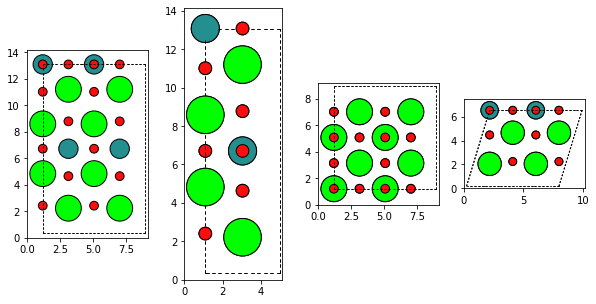

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(10,5))
a.plot(ax=ax[0], repeats=(2,1,1))
a.plot(ax=ax[1], repeats=(2,1,1), rotation='90x, 90y, 0z')
a.plot(ax=ax[2], rotation='0x, 0y, 0z')
a.plot(ax=ax[3], primitive=True, radii=0.8)

For a more interactive view, you can call `.view()`, which launches the ase GUI in a new window, for interactive exploration. Note the menus for this contain many options.

In [34]:
help(a.view)

Help on method view in module peaks.utils.structure:

view(primitive=False) method of peaks.utils.structure.structure instance
    Launch interactive view of the crystal structure; thin wrapper for ase.visualize.view.
    
    Input parameters:
        primitive (optional, bool) - display the primative or conventional cell (default=False)



In [35]:
# Uncomment to run
# a.view()
# a.view(primitive=True)

## X-ray diffraction patterns

To simulate and plot the powder x-ray diffraction pattern for the crystal, call `.plot_xrd`. This uses the `pymatgen.analysis.diffraction.xrd` module.

In [36]:
help(a.plot_xrd)

Help on method plot_xrd in module peaks.utils.structure:

plot_xrd(primitive=False, wavelength='CuKa', two_theta_range=(0, 90), annotate_peaks='compact', symprec=0, debye_waller_factors=None, ax=None, with_labels=True, fontsize=16, ylog_scale=True, show=False) method of peaks.utils.structure.structure instance
    Calculate and plot the powder x-ray diffraction pattern for the crystal, using the
    pymatgen.analysis.diffraction.xrd module.
    
    Input parameters:
        primitive (optional, bool) - calculate for the primative or conventional cell (default=False)
          wavelength (str/float) – The wavelength can be specified as either a float or a string.
          If it is a string, it must be one of:
            'CuKa', 'CuKa2', 'CuKa1', 'CuKb1', 'MoKa', 'MoKa2', 'MoKa1', 'MoKb1',
            'CrKa', 'CrKa2', 'CrKa1', 'CrKb1', 'FeKa', 'FeKa2', 'FeKa1', 'FeKb1',
            'CoKa', 'CoKa2', 'CoKa1', 'CoKb1', 'AgKa', 'AgKa2', 'AgKa1', 'AgKb1'
          If it is a float, it is i

E.g. plot the XRD pattern for the conventional cell (default option)

<AxesSubplot:xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

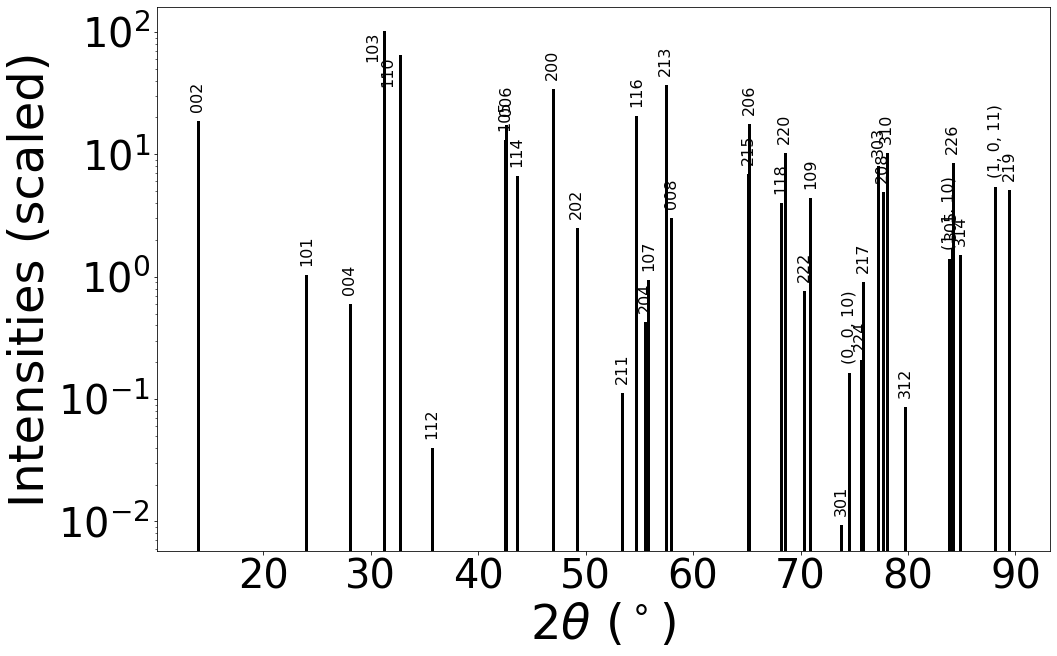

In [37]:
a.plot_xrd()

This can also be passed to a specific existing `matplotlib` axis, e.g. for overplotting on some data or having more control over the layout: 

<AxesSubplot:xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

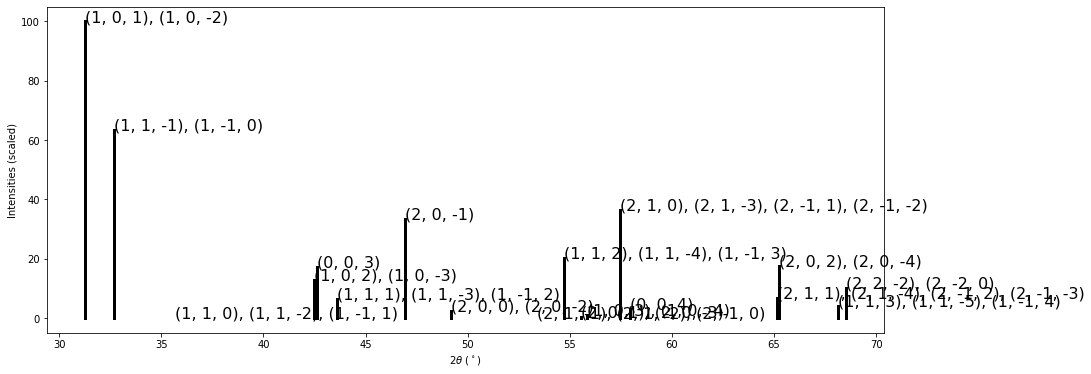

In [38]:
fig, ax = plt.subplots(ncols=1, figsize=(15,6))
a.plot_xrd(primitive=True, annotate_peaks='full',ylog_scale=False, two_theta_range=(30,70),ax=ax)


## Brillouin zones

You can access the special k-points of the Brillouin zone by the function `.utils.structure.special_kpoints` which is a shortcut added to the `ase.atoms.Atoms` class. Can either return the list of high symmetry points in fractional coordinates, or actual k-values in cartesian space if called with `in_k=True` (default).

In [39]:
help(a.structure.special_kpoints)

Help on method special_kpoints in module peaks.utils.structure:

special_kpoints(in_k=True, hv=None) method of ase.atoms.Atoms instance
    Adding a shortcut method to the ase.atoms.Atoms class to access directly the special k-points
    of the Brillouin zone without having to invoke .bandpath().special_points, and for generating these
    in a useful way for ARPES. See `ase.dft.kpoints.BandPath` for definition of the special_points method.
    The k-point definitions are from a paper by Wahyu Setyawana and Stefano Curtarolo::
        http://dx.doi.org/10.1016/j.commatsci.2010.05.010
    
    Input:
        struct (ase.atoms.Atoms object) - crystal structure
        in_k (optional, bool) - whether to return the list of symmetry points in fractional coordinates
          and with conventional labels, or a list of k-values in cartesian space for these points (default).
        hv (optional, float) - if provided, the corresponding angle of photoemission to reach each k-point
          is 

In [40]:
a.structure.special_kpoints()

{'G': array([0., 0., 0.]),
 'A': array([0.81115225, 0.81115225, 0.24674196]),
 'M': array([0.81115225, 0.81115225, 0.        ]),
 'R': array([0.        , 0.81115225, 0.24674196]),
 'X': array([0.        , 0.81115225, 0.        ]),
 'Z': array([0.        , 0.        , 0.24674196]),
 'units': '1/Angstrom'}

In [41]:
a.structure.special_kpoints(in_k=False)

{'G': array([0., 0., 0.]),
 'A': array([0.5, 0.5, 0.5]),
 'M': array([0.5, 0.5, 0. ]),
 'R': array([0. , 0.5, 0.5]),
 'X': array([0. , 0.5, 0. ]),
 'Z': array([0. , 0. , 0.5]),
 'units': 'scaled'}

In [42]:
a.primitive.special_kpoints()

{'G': array([0., 0., 0.]),
 'N': array([0.81115225, 0.        , 0.24674196]),
 'P': array([0.81115225, 0.81115225, 0.24674196]),
 'S': array([0.88620794, 0.        , 0.        ]),
 'S1': array([0.73609655, 0.        , 0.49348392]),
 'X': array([0.81115225, 0.81115225, 0.        ]),
 'Y': array([0.88620794, 0.73609655, 0.        ]),
 'Y1': array([0.73609655, 0.73609655, 0.49348392]),
 'Z': array([0.        , 0.        , 0.49348392]),
 'units': '1/Angstrom'}

In [43]:
a.primitive.special_kpoints(in_k=False)

{'G': array([0., 0., 0.]),
 'N': array([0.5, 0. , 0. ]),
 'P': array([ 0.5 ,  0.5 , -0.25]),
 'S': array([ 0.54626486,  0.        , -0.27313243]),
 'S1': array([0.45373514, 0.        , 0.27313243]),
 'X': array([ 0.5,  0.5, -0.5]),
 'Y': array([ 0.54626486,  0.45373514, -0.5       ]),
 'Y1': array([0.45373514, 0.45373514, 0.04626486]),
 'Z': array([0. , 0. , 0.5]),
 'units': 'scaled'}

If called with the argument `hv=...`, then the corresponding angle of photoemission to reach each k-point is determined for the given photon energy, $h\nu$, assuming the path is directly from $\Gamma$ to the relevant symmetry point (i.e. that the analyser slit is aligned along that high symmetry direction), and a work function of 4.35 eV is assumed.

In [44]:
a.structure.special_kpoints(hv=100)

{'G': (array([0., 0., 0.]), 0.0),
 'A': (array([0.81115225, 0.81115225, 0.24674196]), -13.54),
 'M': (array([0.81115225, 0.81115225, 0.        ]), -13.24),
 'R': (array([0.        , 0.81115225, 0.24674196]), -9.74),
 'X': (array([0.        , 0.81115225, 0.        ]), -9.32),
 'Z': (array([0.        , 0.        , 0.24674196]), -2.82),
 'units': '(1/Angstrom, degrees for ARPES @ hv=100)'}

You can plot the Brillouin zone using `.plot_bz`

In [45]:
help(a.plot_bz)

Help on method plot_bz in module peaks.utils.structure:

plot_bz(primitive=True, surf=None, bzs=None, vectors=True, path=None, sym_points=True, sym_labels=True, rot_angle=None, rot_axis=(0, 0, 1), elev=None, azim=None, pointstyle=None, ax=None, hide_axes=True, show=False) method of peaks.utils.structure.structure instance
    Plot the Brillouin zone; Taken largely from ase.dft.bz.bz_plot with some minor modifications
    
    Input parameters:
        primitive (optional, bool) - display the primative or conventional cell (default=True)
        surf (optional) - surf=(h,k,l) displays the surface Brillouin zone corresponding
          to the (h,k,l) surface; defaults to displaying the bulk zone
        bzs (optional) - which Brillouin zones to display:
            - None: defaults to (0,0) or (0,0,0)
            - int: plots int zones
            - list of tuples: plots specified bzs,
                e.g. [(0,0),(0,1)] for a 2D case or [(0,0,0),(0,0,1),(0,0,2)] for a 3D case
        vec

By default the BZ of the primitive cell is shown 

<Axes3DSubplot:>

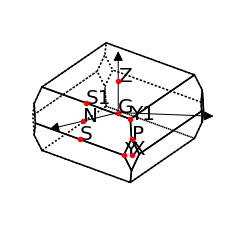

In [60]:
a.plot_bz()

The conventional cell can be returned with the flag `primitive=False`

<Axes3DSubplot:>

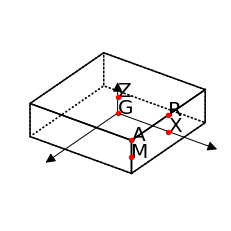

In [61]:
a.plot_bz(primitive=False)

There are various other display options (paths, sym points, orientations, which ax to append to etc.)

<Axes3DSubplot:>

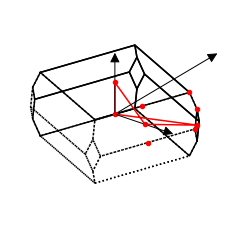

In [62]:
a.plot_bz(sym_labels=False,path=['G','Z','N','X','G'], azim=-30)

Multiple Brillouin zones can be plotted via the `bzs` flag. This can either by an integer to display each shell of bzs (up to nG1+nG2 for `bzs=n`), or a list of zone indicies:

<Axes3DSubplot:>

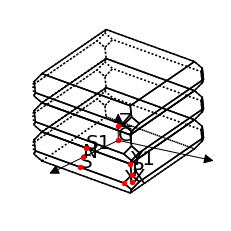

In [63]:
a.plot_bz(bzs=[(0,0,0),(0,0,1),(0,0,2)])

<Axes3DSubplot:>

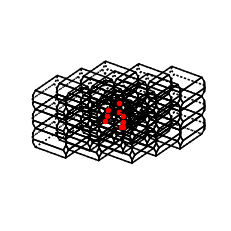

In [64]:
a.plot_bz(bzs=2)

It is also possible to get an interactive view of a single BZ using `.view` and navigating to `Tools`-`Reciprocal Space` from the menu

In [51]:
# Uncomment to run
# a.view(primitive=True)

### Surface Brillouin zone

A surface unit cell can be made using `.surf(miller, primitive=False)` where miller is the miller index of the desired surface, and you can specify whether this is for the primitive or conventional (defualt) cell

In [49]:
help(a.surf)

Help on method surf in module peaks.utils.structure:

surf(miller, primitive=False) method of peaks.utils.structure.structure instance
    Make a given index surface.
    
    Input parameters:
        miller (tuple) - miller indicies in format (h, k, l)
        primitive (optional, bool) - display the primative or conventional cell (default=False)
    
    Output:
        new instance of structure class, now for the surface structure



In [50]:
a_surf = a.surf((0,0,1))

<AxesSubplot:>

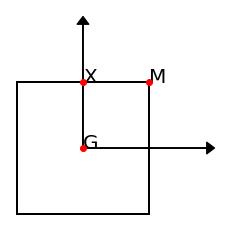

In [51]:
a_surf.plot_bz()

The special k-points of this 2D Brillouin zone are now also avaialble

In [52]:
a_surf.structure.special_kpoints()

{'G': array([0., 0., 0.]),
 'M': array([0.81115225, 0.81115225, 0.        ]),
 'X': array([0.        , 0.81115225, 0.        ]),
 'units': '1/Angstrom'}

In [53]:
a_surf.structure.special_kpoints(hv=21)

{'G': (array([0., 0., 0.]), 0.0),
 'M': (array([0.81115225, 0.81115225, 0.        ]), -33.28),
 'X': (array([0.        , 0.81115225, 0.        ]), -22.83),
 'units': '(1/Angstrom, degrees for ARPES @ hv=21)'}

If just for BZ plotting, you can specify the surface directly in the plot call on the bulk structure using `surf=(h,k,l)` for the $(h,k,l)$ miller indices:

In [54]:
a.vectors

{'conventional': {'a1': '3.873x + 0.0y + 0.0z ',
  'a2': '0.0x + 3.873y + 0.0z ',
  'a3': '0.0x + 0.0y + 12.7323z ',
  'a units': 'Angstrom',
  'b1': '1.6223044944951164x + 0.0y + 0.0z ',
  'b2': '0.0x + 1.6223044944951164y + 0.0z ',
  'b3': '0.0x + 0.0y + 0.493483919415941z ',
  'b units': '1/Angstrom'},
 'primitive': {'a1': '3.873x + 0.0y + 0.0z ',
  'a2': '0.0x + 3.873y + 0.0z ',
  'a3': '-1.9365x + -1.9365y + 6.36615z ',
  'a units': 'Angstrom',
  'b1': '1.6223044944951164x + 0.0y + 0.49348391941594066z ',
  'b2': '0.0x + 1.6223044944951166y + 0.49348391941594083z ',
  'b3': '0.0x + 0.0y + 0.9869678388318823z ',
  'b units': '1/Angstrom'}}

<AxesSubplot:>

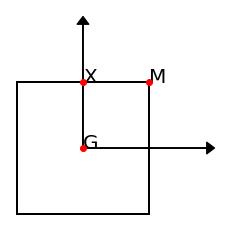

In [55]:
a.plot_bz(primitive=True, surf=(0,0,1))

Multiple bzs can again be shown:

<AxesSubplot:>

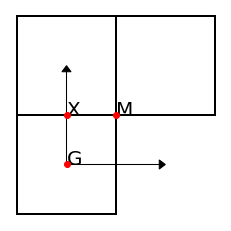

In [56]:
a.plot_bz(bzs=[(0,0),(0,1),(1,1)], primitive=False, surf=(0,0,1))

The BZ can be rotated using the `rot_angle` flag, where the rotation angle is given in degrees:

<AxesSubplot:>

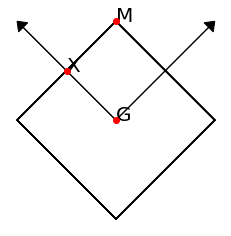

In [57]:
a.plot_bz(rot_angle=45, primitive=False, surf=(0,0,1))

This can also be utilised for 3D BZs, where in addition a rotation axis can be speficied using e.g. `rot_axis=(0,0,1)`. The [0,0,1] direction is the default

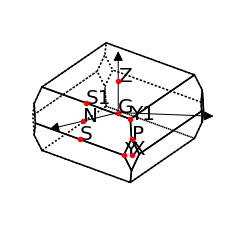

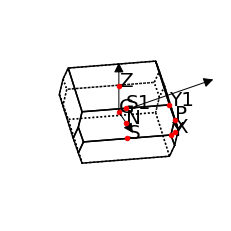

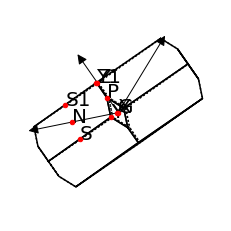

<Axes3DSubplot:>

In [65]:
a.plot_bz(rot_angle=0, show=True)
a.plot_bz(rot_angle=45, show=True)
a.plot_bz(rot_angle=45, rot_axis=(1,0,0), show=True)

<Axes3DSubplot:>

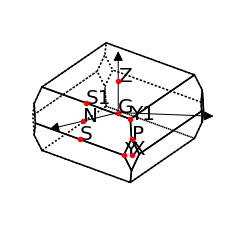

In [66]:
a.plot_bz()

## Cut planner

You can call a cut planner to assist with finding the correct angles for ARPES cuts using `.cut_planner`. Many of the options are the same as for the `.plot_bz` function:

In [67]:
help(a.cut_planner)

Help on method cut_planner in module peaks.utils.structure:

cut_planner(primitive=True, surf=None, bzs=None, vectors=False, path=None, sym_points=True, sym_labels=True, rot_angle=None, rot_axis=(0, 0, 1), elev=None, azim=None, hide_axes=False) method of peaks.utils.structure.structure instance
    Cut planned for aiding ARPES alignment.
    
    Input parameters:
        primitive (optional, bool) - display the primative or conventional cell (default=True)
        surf (optional) - surf=(h,k,l) displays the surface Brillouin zone corresponding
          to the (h,k,l) surface; defaults to displaying the bulk zone
        bzs (optional) - which Brillouin zones to display:
            - None: defaults to (0,0) or (0,0,0)
            - int: plots int zones
            - list of tuples: plots specified bzs,
                e.g. [(0,0),(0,1)] for a 2D case or [(0,0,0),(0,0,1),(0,0,2)] for a 3D case
        vectors (optional, bool) - display the lattice vectors (default = True)
        path

This broadly works for 2D or surface BZs at present, although the angular conventions are not yet implemented to match the true manipulator ones (in terms of relative signs)

In [70]:
a.cut_planner(primitive=False, surf=(0,0,1), bzs=2)

It is a bit hacked for kz planning - when first loaded, often the cut plane will be off scale. Try shifting the BZs using the BZ shift option. E.g. in this example, sensible settings are e.g. [0,0,4] for the BZ shift (in this case for the primitive cell), meaning the bottom zone shown is the 4th BZ along $k_z$.

In [69]:
a.cut_planner(primitive=True, bzs=[(0,0,0),(0,0,1)],elev=2,azim=5)

### BZ sections:

Taking a slice out of a 3D BZ plot at arbitrary height and orientation (e.g. for plotting in-plane pattern of repeated BZ which tessalate with some out of plane stacking component) is implemented in `.plot_bz_section`

In [66]:
help(a.plot_bz_section)

Help on method plot_bz_section in module PyPhoto.utils.structure:

plot_bz_section(primitive=True, bzs=None, plane_normal=[0, 0, 1], plane_origin=[0, 0, 0], rot_angle=None, ax=None, hide_axes=True, show=False, **kwargs) method of PyPhoto.utils.structure.structure instance
    Plots a section through one or repreated 3D Brillouin zones for a given plane and origin
    
    Input parameters:
        primitive (optional, bool) - display the primative or conventional cell (default=True)
        bzs (optional) - which Brillouin zones to display:
            - None: defaults to (0,0) or (0,0,0)
            - int: plots int zones
            - list of tuples: plots specified bzs,
                e.g. [(0,0),(0,1)] for a 2D case or [(0,0,0),(0,0,1),(0,0,2)] for a 3D case
        plane_normal (optional) - normal of plane to cut the BZ in, NB in cartesian coordinates
            default = [0,0,1]
        plane_origin (optional) - origin of plane to cut BZ in, NB in cartesian coordinates:
       

The plane to cut is defined by a `plane_normal` and a `plane_origin`. The normal is a vector specfied in a cartesian reference frame. The origin can either be specified as a point `[x,y,z]` again in a cartesian reference frame, or by passing the name of a high-symmetry point.

<Axes3DSubplot:>

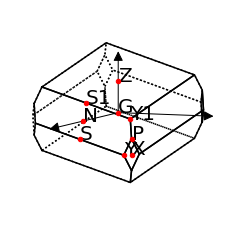

In [67]:
a.plot_bz()

Text(0.5, 1.0, 'G-Z-S1-N-S-plane')

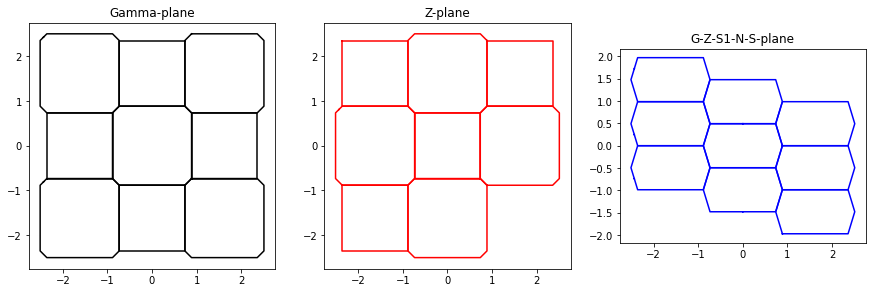

In [68]:
fig, axes = plt.subplots(ncols=3, figsize=(15,5))
a.plot_bz_section(primitive=True, plane_normal=[0,0,1], plane_origin='G', rot_angle=0, bzs=2, hide_axes=False, ax=axes[0])
a.plot_bz_section(primitive=True, plane_normal=[0,0,1], plane_origin='Z', rot_angle=0, bzs=2, hide_axes=False, ax=axes[1], color='r')
a.plot_bz_section(primitive=True, plane_normal=[1,0,0], plane_origin='G', rot_angle=90, bzs=2, hide_axes=False, ax=axes[2], color='b')
axes[0].set_title('Gamma-plane')
axes[1].set_title('Z-plane')
axes[2].set_title('G-Z-S1-N-S-plane')